# Lec 3  

## 5 CZ 

### 5.9
![image info](./images/CZ_5_9.png)

$$x^2_1-x^2_2=12$$ 
$$x_2=8/x_1$$
$$x^2_1-8/x_1=12$$
$$x^4_1-12x^2_1-64=0$$

$$\begin{matrix} 
4 \\
2 
\end{matrix}$$

$$\begin{matrix} 
-4 \\
-2 
\end{matrix}$$


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def p(x):
    return x**4 - 12*x**2-64


coeffs = [1, 0, -12, 0, -64]
print(np.roots(coeffs))



[-4.00000000e+00+0.j  4.00000000e+00+0.j  2.77555756e-16+2.j
  2.77555756e-16-2.j]


### 5.10 a
![image info](./images/CZ_5_10a.png)



Have
$$
f(x)=f(x_0)+1/1*Df(x_0)(x-x_0)+1/2*(x-x_0)^T*D^2*f(x_0)(x-x_0) \\
= 
$$

We compute

$$Df(x)=
\begin{matrix} 
[e^{-x_2}, -x_1e^{-x_2}+1] 
\end{matrix}$$

Hence

$$
\begin{align}
f(x)  
&= 2 +
\begin{bmatrix} 
1 & 0 
\end{bmatrix} *
\begin{bmatrix} 
x_1 - 1 \\
x_2
\end{bmatrix} + 1/2 * 
\begin{bmatrix} 
x_1 - 1 x_2
\end{bmatrix} * 
\begin{bmatrix} 
0 & -1 \\
-1 & 1 
\end{bmatrix} *
\begin{bmatrix} 
x_1 - 1 \\
x_2
\end{bmatrix} \\
&=
2 + x_1-1+1/2*()
\end{align}
$$

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sympy import init_printing, symbols, Matrix, simplify
init_printing(use_unicode=False, wrap_line=False)

def f(x, y):
    return x*np.exp(-y)+y+1

x_0 = [1, 0] 

f(x_0[0], x_0[1])
x1, x2 = symbols('x1,x2')
#Matrix(([x1-1, x2])).dot(Matrix(([0, -1], [-1, 1])) * Matrix(([x1-1], [x2])))
#Matrix(([0, -1], [-1, 1])) * Matrix(([x1-1], [x2]))
#Matrix(([x1-1, x2])).dot(Matrix(([0, -1], [-1, 1]))).dot(Matrix(([x1-1], [x2])))
f = 2 + Matrix(([1,0])).dot(Matrix(([x1-1], [x2]))) + 1/2 * Matrix(([x1-1, x2])).dot(Matrix(([0, -1], [-1, 1])) * Matrix(([x1-1], [x2])))
simplify(f)

C:\Users\MLR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\MLR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\MLR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\MLR\AppData\Local\Programs\Py

### 5.10 b
![image info](./images/CZ_5_10b.png)

Have
$$
f(x)=f(x_0)+1/1*Df(x_0)(x-x_0)+1/2*(x-x_0)^T*D^2f(x_0)(x-x_0) \\
= 
$$

We compute

$$Df(x)=
\begin{matrix} 
[e^{-x_2}, -x_1e^{-x_2}+1] 
\end{matrix}$$

Hence

$$
\begin{align}
f(x)  
&= 2 +
\begin{bmatrix} 
1 & 0 
\end{bmatrix} *
\begin{bmatrix} 
x_1 - 1 \\
x_2
\end{bmatrix} + 1/2 * 
\begin{bmatrix} 
x_1 - 1 x_2
\end{bmatrix} * 
\begin{bmatrix} 
0 & -1 \\
-1 & 1 
\end{bmatrix} *
\begin{bmatrix} 
x_1 - 1 \\
x_2
\end{bmatrix} \\
&=
2 + x_1-1+1/2*()
\end{align}
$$

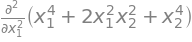

In [137]:
from sympy import lambdify, transpose, dsolve, Derivative
x1, x2 = symbols('x1,x2')

def f(x1, x2): 
    return x1**4+2*x1**2*x2**2+x2**4

expr = x1**4+2*x1**2*x2**2+x2**4

d = Matrix(([expr.diff((x1)), expr.diff((x2))]))
d = lambdify([x1, x2], d)
d2 = Matrix(([expr.diff((x1), 2), expr.diff((x2), 2)]))
d2 = lambdify([x1, x2], d2)

x0 = Matrix(([1], [1]))
x = Matrix(([x1], [x2]))
#f = 2 + Matrix(([1,0])).dot(Matrix(([x1-1], [x2]))) + 1/2 * Matrix(([x1-1, x2])).dot(Matrix(([0, -1], [-1, 1])) * Matrix(([x1-1], [x2])))
#f_x = f(1, 1)+1*Matrix(d(1, 1)).dot((x-x0))+1/2*transpose(x-x0).dot(Matrix(d2(1, 1))*(x-x0))


## 6 CZ

### 6.3 
![image info](./images/CZ_6_3.png)

### 6.8 
![image info](./images/CZ_6_8.png)

### 6.10
![image info](./images/CZ_6_10.png)

### 6.11
![image info](./images/CZ_6_11.png)

### 6.20
![image info](./images/CZ_6_20.png)

### 6.23 
![image info](./images/CZ_6_23.png)

## Quadratic Forms
![image info](./images/QF.png)
### 10

### 11 

### 12